In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kit import *
from numbers import Number

In [ ]:
def gaussian_padded_square_pulse(pulse_width, sigma, n_pts=1000):
    """Generates a Gaussian-padded square pulse.

    Parameters:
        pulse_width (float): The width of the square part of the pulse.
        sigma (float): The standard deviation of the Gaussian padding.
        n_pts (int): The number of points in the generated pulse.

    Returns:
        t (numpy.ndarray): Time array for the pulse.
        pulse (numpy.ndarray): The Gaussian-padded square pulse.
    """
    # Define the time array
    t = np.linspace(-3 * sigma - pulse_width / 2, 3 * sigma + pulse_width / 2, n_pts)
    
    # Create the square pulse
    square = np.zeros_like(t)
    square[np.abs(t) <= pulse_width / 2] = 1
    
    # Create the Gaussian envelopes
    gaussian_rising = np.exp(-0.5 * ((t + pulse_width / 2) / sigma)**2)
    gaussian_falling = np.exp(-0.5 * ((t - pulse_width / 2) / sigma)**2)
    
    # Combine the square pulse with the Gaussian paddings
    pulse = np.maximum(square, gaussian_rising)
    pulse = np.maximum(pulse, gaussian_falling)
    
    return t, pulse

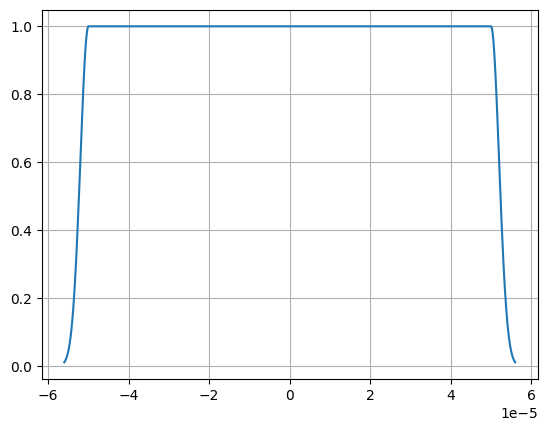

In [2]:
t, pulse = gaussian_padded_square_pulse(
    pulse_width=100e-6,
    sigma=2e-6,
    n_pts=1000
)
plt.plot(t, pulse)
plt.grid()
plt.show()

In [3]:
def generate_cavity_emmision(t: np.array, A0: Number, kappa: Number, a_in: np.array):
    """Generate cavity emmision signal as eqa(3.5) in page 47.
    
    t: time, should be greater then 0.
    A0 : the cavity mode is prepared to be A0 at t=0.
    kappa : filed decay rate
    a_in : input field from t = 0 ~ t.
    
    """
    emmision = np.zeros_like(t)
    for index, tp in enumerate(t) :
        t_domain = t[:index]
        a_in_codomain = a_in[:index]
        integral = np.dot( np.exp(kappa*t_domain/2), a_in_codomain )
        emmision[index] = np.exp(-kappa*tp/2)*A0 + np.sqrt(kappa)*np.exp(-kappa*tp/2)*integral
    return emmision

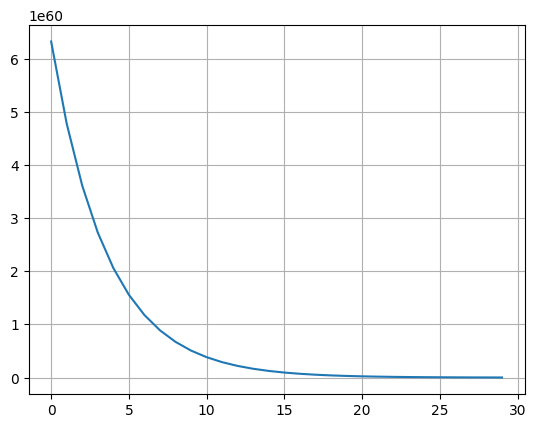

In [4]:
kappa = 5e+6
A0 = 1
emission = generate_cavity_emmision(t, A0, kappa, pulse)[:30] + generate_noise(30)
plt.plot(emission)
plt.grid()
plt.show()